Analyze the impact of drivers' devices on the number of rides. Specifically, the test must determine whether there is a statistically significant difference in the average number of rides between iPhone and Android users.

In [1]:
# Import any relevant packages or libraries
import pandas as pd
from scipy import stats

# Load dataset into dataframe
df = pd.read_csv('waze_dataset.csv')

To conduct our analysis, we will convert the `device` column from categorical to numerical. This will help us filter the data more effectively later on.

In [2]:
# 1. Create `map_dictionary`
map_dictionary = {'Android': 2, 'iPhone': 1}

# 2. Create new `device_type` column
df['device_type'] = df['device']

# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

The next step is to determine the average number of drives among Android and iOS users. The result will show the average distance traveled in kilometers by users on each type of device.

In [3]:
df.groupby('device_type')['drives'].mean()

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64

We observe that in our data sample, iOS users traveled an average of 68 km in the last month, while Android users traveled 66 km.  

Based on this information, we can formulate our null hypothesis, assuming that the differences between Android and iOS users occur by chance and that there is no significant difference between the two groups.

## Hypotheses:
* 𝐻₀ : There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.
* 𝐻₁ : There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

Next, choose 5% as the significance level and proceed with a two-sample t-test.

In [4]:
# 1. Isolate the `drives` column for iPhone users.
iPhone = df[df['device_type'] == 1]['drives']

# 2. Isolate the `drives` column for Android users.
Android = df[df['device_type'] == 2]['drives']

# 3. Perform the t-test
# stats.ttest_ind(a=iPhone, b=Android, equal_var=False)
t_stat, p_value = stats.ttest_ind(a=iPhone, b=Android, equal_var=False)
print(f"t-stat={t_stat:.2f}, p-value={p_value:.2f}")

t-stat=1.46, p-value=0.14


Since the alternative hypothesis (𝐻₁) states that there is a difference from the null hypothesis, this is a case of a two-tailed test. Therefore, the p-value represents the probability that the z-score is either less than -1.46 or greater than 1.46.  

If 𝐻₁ were instead testing for a greater or lesser difference, we would add the `alternative` parameter to the `stats.ttest_ind` function with a value of `"greater"` or `"less"`, respectively.

Since the p-value is 14%, which is much higher than our 5% significance level, we fail to reject the null hypothesis. This means **there is no statistically significant difference in the average kilometers traveled between Android and iOS users**.

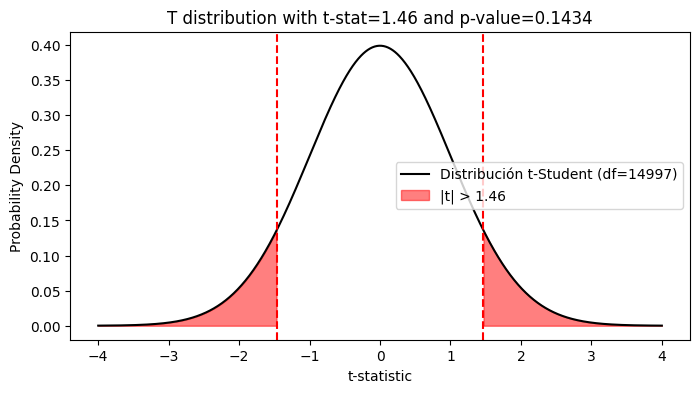

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Perform the t-test
t_stat, p_value = stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

# Approximate degrees of freedom
degree_of_freedom = len(iPhone) + len(Android) - 2  

# Generate the Student t distribution
t_values = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(t_values, df=degree_of_freedom)

# Create the graph
plt.figure(figsize=(8,4))
plt.plot(t_values, t_dist, label=f"Distribución t-Student (df={degree_of_freedom})", color="black")

# Shadows in regions where |t| > |t_stat|
plt.fill_between(t_values, t_dist, where=(t_values < -abs(t_stat)), color="red", alpha=0.5, label=f"|t| > {abs(t_stat):.2f}")
plt.fill_between(t_values, t_dist, where=(t_values > abs(t_stat)), color="red", alpha=0.5)

# Vertical line in t_stat and -t_stat
plt.axvline(-abs(t_stat), color="red", linestyle="dashed")
plt.axvline(abs(t_stat), color="red", linestyle="dashed")

# Tags and title
plt.xlabel("t-statistic")
plt.ylabel("Probability Density")
plt.title(f"T distribution with t-stat={t_stat:.2f} and p-value={p_value:.4f}")
plt.legend()
plt.show()